In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#for loop to retrieve lists of top 2000 movie titles and corresponding revenues
top_mov = ['', '?offset=200', '?offset=400', '?offset=600', '?offset=800', '?offset=1000', '?offset=1200', '?offset=1400', '?offset=1600', '?offset=1800']
list_of_titles = []
list_of_revenue = []
for i in top_mov:
    rev_url = 'https://www.boxofficemojo.com/chart/top_lifetime_gross/{}'.format(i)
    rev_page = requests.get(rev_url)
    revsoup = BeautifulSoup(rev_page.content, 'html.parser')
    rev_title = revsoup.find_all('td', class_='a-text-left mojo-field-type-title')
#                             ('a', class_='a-link-normal')
    practice_titles =[]
    for title in rev_title:
        practice_titles.append(title.text)    
    list_of_titles_and_years = practice_titles#[15:-11]
#     list_of_titles_and_years
    for value in list_of_titles_and_years:
        #if value < "1000" or value > "2020": 
        list_of_titles.append(value)
    rev_money = revsoup.find_all('td', class_='a-text-right mojo-field-type-money')
#     practice_money = []
    for revenue in rev_money:
        list_of_revenue.append(revenue.text)

In [4]:
list_of_revenue

['$936,662,225',
 '$858,373,000',
 '$760,507,625',
 '$700,059,566',
 '$678,815,482',
 '$659,363,944',
 '$652,270,625',
 '$623,357,910',
 '$620,181,382',
 '$608,581,744',
 '$543,638,043',
 '$535,234,033',
 '$532,177,324',
 '$514,798,611',
 '$504,014,165',
 '$486,295,561',
 '$477,103,922',
 '$474,544,677',
 '$460,998,507',
 '$459,005,868',
 '$448,139,099',
 '$441,226,247',
 '$435,110,554',
 '$434,038,008',
 '$426,829,839',
 '$424,668,047',
 '$423,315,812',
 '$422,783,777',
 '$417,719,760',
 '$415,004,880',
 '$412,563,408',
 '$409,013,994',
 '$408,084,349',
 '$408,010,692',
 '$407,022,860',
 '$404,540,171',
 '$402,828,120',
 '$402,111,870',
 '$400,738,009',
 '$390,532,085',
 '$389,813,101',
 '$381,409,310',
 '$380,843,261',
 '$380,270,577',
 '$377,845,905',
 '$373,585,825',
 '$370,782,930',
 '$368,384,330',
 '$368,065,385',
 '$364,001,123',
 '$363,070,709',
 '$356,461,711',
 '$355,559,216',
 '$353,007,020',
 '$352,390,543',
 '$350,126,372',
 '$342,551,365',
 '$341,268,248',
 '$337,135,885

In [5]:
list_of_titles

['Star Wars: Episode VII - The Force Awakens',
 'Avengers: Endgame',
 'Avatar',
 'Black Panther',
 'Avengers: Infinity War',
 'Titanic',
 'Jurassic World',
 'The Avengers',
 'Star Wars: Episode VIII - The Last Jedi',
 'Incredibles 2',
 'The Lion King',
 'The Dark Knight',
 'Rogue One: A Star Wars Story',
 'Star Wars: Episode IX - The Rise of Skywalker',
 'Beauty and the Beast',
 'Finding Dory',
 'Frozen II',
 'Star Wars: Episode I - The Phantom Menace',
 'Star Wars: Episode IV - A New Hope',
 'Avengers: Age of Ultron',
 'The Dark Knight Rises',
 'Shrek 2',
 'E.T. the Extra-Terrestrial',
 'Toy Story 4',
 'Captain Marvel',
 'The Hunger Games: Catching Fire',
 "Pirates of the Caribbean: Dead Man's Chest",
 'The Lion King',
 'Jurassic World: Fallen Kingdom',
 'Toy Story 3',
 'Wonder Woman',
 'Iron Man 3',
 'Captain America: Civil War',
 'The Hunger Games',
 'Spider-Man',
 'Jumanji: Welcome to the Jungle',
 'Jurassic Park',
 'Transformers: Revenge of the Fallen',
 'Frozen',
 'Spider-Man: Fa

In [6]:
#created dicts, 1 of each for movie titles and revenues
title_dict = {'Movie Title': list_of_titles}
revenue_dict = {'Revenue': list_of_revenue}

In [7]:
#dataframe of titles
top_titles = pd.DataFrame.from_dict(title_dict)
top_titles

,Movie Title
0,Star Wars: Episode VII - The Force Awakens
1,Avengers: Endgame
2,Avatar
3,Black Panther
4,Avengers: Infinity War
...,...
1995,Sherlock Gnomes
1996,The Jungle Book
1997,Point Break
1998,Biloxi Blues


In [8]:
#created dataframe of revenue without non-int values so it can be used in visuals
top_rev = pd.DataFrame.from_dict(revenue_dict)
top_rev = [int(x.replace('$', '').replace(',', '')) for x in top_rev['Revenue']]
true_rev = {'Revenue': top_rev}
true_top_rev = pd.DataFrame.from_dict(true_rev)
true_top_rev

,Revenue
0,936662225
1,858373000
2,760507625
3,700059566
4,678815482
...,...
1995,43242871
1996,43229904
1997,43218387
1998,43184798


In [9]:
#concat the dataframes to create 1 dataframe with both datasets
top2000_unclean = pd.concat([top_titles, true_top_rev], axis = 1)
top2000 = top2000_unclean.set_index('Movie Title')
top2000 = top2000.reset_index()
top2000

,Movie Title,Revenue
0,Star Wars: Episode VII - The Force Awakens,936662225
1,Avengers: Endgame,858373000
2,Avatar,760507625
3,Black Panther,700059566
4,Avengers: Infinity War,678815482
...,...,...
1995,Sherlock Gnomes,43242871
1996,The Jungle Book,43229904
1997,Point Break,43218387
1998,Biloxi Blues,43184798


In [23]:
#for loop for APIs to get general info about a huge dataset of movies
list_of_jsons =[]
for i in range(1,501):
    response = requests.get(f"https://api.themoviedb.org/3/discover/movie?page={i}&api_key=26321807a85638c70b1948a5b58528f4")
    data = response.json()['results']
    for y in range(0,20):
        list_of_jsons.append({'Movie Title': data[y]['title'], 'popularity': data[y]['popularity'], 'vote_count': data[y]['vote_count'], 'vote_average':data[y]['vote_average'],
                             'language': data[y]['original_language'], 'genre_ids': data[y]['genre_ids']})
tmdb=pd.DataFrame(list_of_jsons)
# tmdb

In [11]:
# merged the API dataframe and the revenue dataframe and aligned the sets through the common 'Movie Title' column 
df = pd.merge(top2000_unclean, tmdb, on=['Movie Title'])
df

,Movie Title,Revenue,popularity,vote_count,vote_average,language,genre_ids
0,Avengers: Endgame,858373000,60.263,11429,8.3,en,"[28, 12, 878]"
1,Avatar,760507625,30.910,20405,7.4,en,"[28, 12, 14, 878]"
2,Black Panther,700059566,41.837,14346,7.4,en,"[28, 12, 14, 878]"
3,Avengers: Infinity War,678815482,102.134,16915,8.3,en,"[28, 12, 878]"
4,Titanic,659363944,34.914,16038,7.8,en,"[18, 53, 10749]"
...,...,...,...,...,...,...,...
2003,Sherlock Gnomes,43242871,11.666,422,5.5,en,"[16, 14, 10751]"
2004,Point Break,43218387,12.976,1860,7.1,en,"[28, 80, 53]"
2005,Point Break,43218387,11.748,1405,5.7,en,"[28, 80, 53]"
2006,Biloxi Blues,43184798,6.821,119,6.4,en,"[35, 18, 10749]"


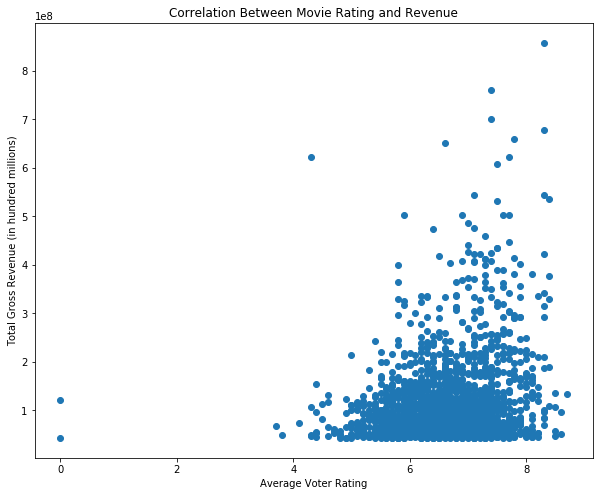

In [24]:
fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(df['vote_average'], df['Revenue'])
ax.set_xlabel('Average Voter Rating')
ax.set_ylabel('Total Gross Revenue (in hundred millions)')
ax.set_title('Correlation Between Movie Rating and Revenue')
plt.show()

In [13]:
pd.DataFrame(df).to_csv('Top Grossing Movies.csv')

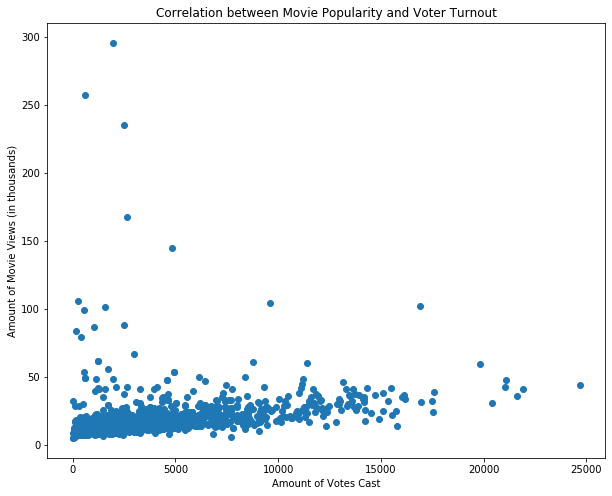

In [25]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(df['vote_count'], df['popularity'])
ax.set_xlabel('Amount of Votes Cast')
ax.set_ylabel('Amount of Movie Views (in thousands)')
ax.set_title('Correlation between Movie Popularity and Voter Turnout')

plt.show()

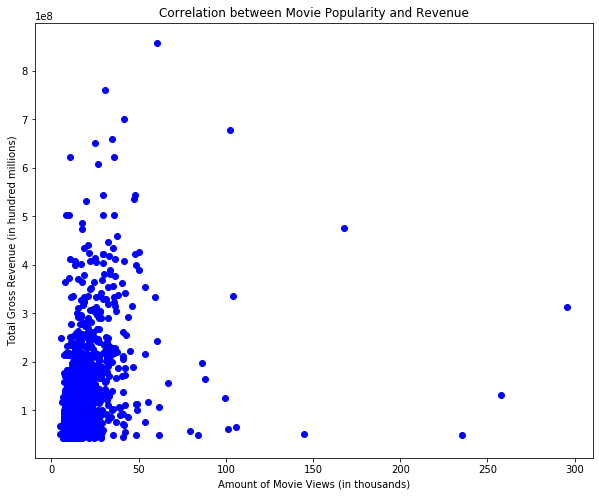

In [26]:
fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(df['popularity'], df['Revenue'], color='b')
ax.set_xlabel('Amount of Movie Views (in thousands)')
ax.set_ylabel('Total Gross Revenue (in hundred millions)')
ax.set_title('Correlation between Movie Popularity and Revenue')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

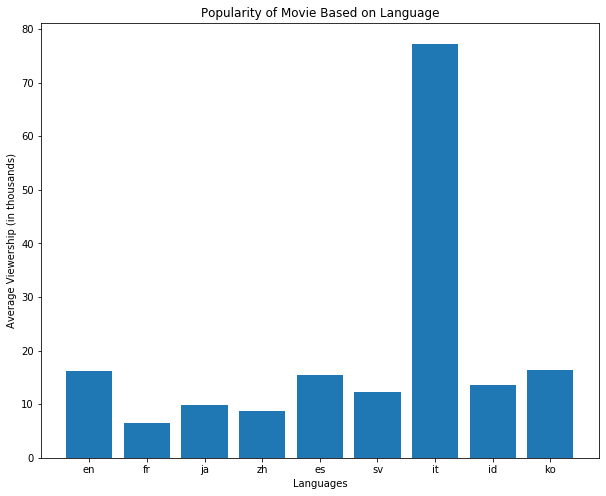

In [28]:
un=df['language'].unique()
un
lang=df.groupby('language')['popularity'].mean().values
lang
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(un, lang)
ax.set_xlabel('Languages')
ax.set_ylabel("Average Viewership (in thousands)")
ax.set_title('Popularity of Movie Based on Language')
plt.show

In [18]:
#stuff left to to do according to rubric
#business problem: if public opinion has effect on sales/ possible if language has effect on revenue or popularity
# readme: what the project was, our objective to accomplish, skills required to complete (pythong, web scraping, visualisation), what we posted on github, questions we posed, data we collected, how we put our data together, our recommendations to the Microsoft, how we arrived to our conclusion, steps i would take if i had more time
#drawing conclusions
#presentation

<function matplotlib.pyplot.show(*args, **kw)>

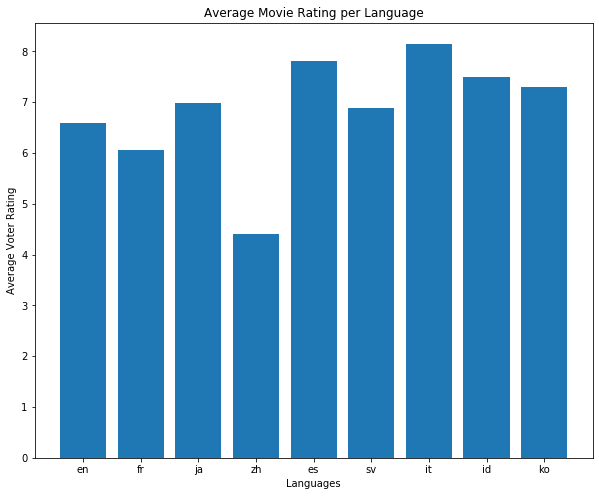

In [29]:
un=df['language'].unique()
un
lang=df.groupby('language')['vote_average'].mean().values
lang
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(un, lang)
ax.set_xlabel('Languages')
ax.set_ylabel("Average Voter Rating")
ax.set_title('Average Movie Rating per Language')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

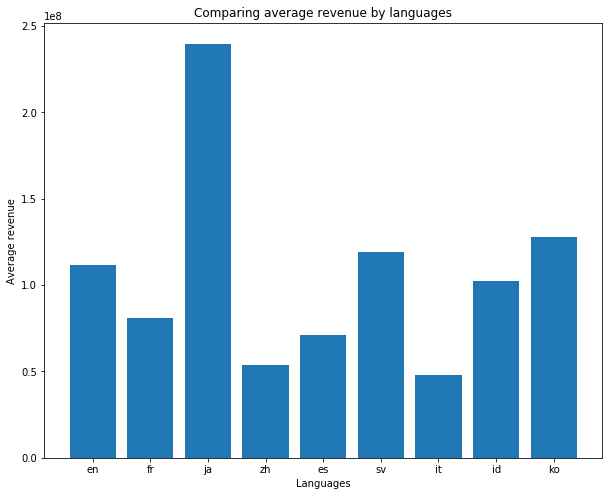

In [30]:
un=df['language'].unique()
un
lang=df.groupby('language')['Revenue'].mean().values
lang
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(un, lang)
ax.set_xlabel('Languages')
ax.set_ylabel("Average revenue")
ax.set_title('Comparing average revenue by languages')
plt.show

In [ ]:
# ask Dilara about yaxis for comparing avg rev vs lang